## [作業重點]
使用 Sklearn 中的線性迴歸模型，來訓練各種資料集，務必了解送進去模型訓練的**資料型態**為何，也請了解模型中各項參數的意義

## 作業
試著使用 sklearn datasets 的其他資料集 (wine, boston, ...)，來訓練自己的線性迴歸模型。

### HINT: 注意 label 的型態，確定資料集的目標是分類還是回歸，在使用正確的模型訓練！

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

In [3]:
boston = datasets.load_boston()

In [8]:
import pandas as pd

In [10]:
boston

{'DESCR': "Boston House Prices dataset\n===========================\n\nNotes\n------\nData Set Characteristics:  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive\n    \n    :Median Value (attribute 14) is usually the target\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per

In [14]:
df_x = pd.DataFrame(boston.data,columns=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD','TAX', 'PTRATIO', 'B', 'LSTAT'])
df_y = pd.DataFrame(boston.target,columns=['target'])

In [23]:
df_xy = pd.concat([df_x,df_y],axis=1)
df_xy

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


In [43]:
### It's a regression task, I choose Linear regression.
### DIS means the weighted distances to five Boston employment centres.

x = df_xy['DIS'].values.reshape(-1,1)
y = df_xy.target.values


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=4)

regr = linear_model.LinearRegression()
regr.fit(x_train, y_train)

y_pred = regr.predict(x_test)

In [38]:
print('Coefficients: ', regr.coef_)

print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))

Coefficients:  [1.08133057]
Mean squared error: 75.82


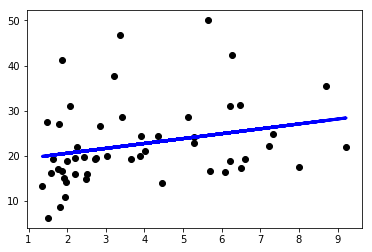

In [39]:
plt.scatter(x_test, y_test,  color='black')
plt.plot(x_test, y_pred, color='blue', linewidth=3)
plt.show()